compare different search algorithms


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

sns.set_context("talk")

FILENAME = "series/series|2024-11-17|analyze_angles/data.json"

In [ ]:
with open("../data/" + FILENAME) as file:
    json_file = json.load(file)#, parse_float=lambda f: round(float(f), 2))
    data = pd.json_normalize(
        json_file,
        record_path=["snapshots"],
        meta=[
            ["settings", "maxCost"],
            ["settings", "patchImprovement"],
            ["settings", "patchRecovery"],
            ["settings", "searchStrategy"],
            ["settings", "recoveryLogic"],
        ],
    )

data["pI"] = data["settings.patchImprovement"]
data["pR"] = data["settings.patchRecovery"]
data["ratio"] = data["pI"] / data["pR"]
data["costRatio"] = data["averageTravelCost"] / data["settings.maxCost"]

data.columns

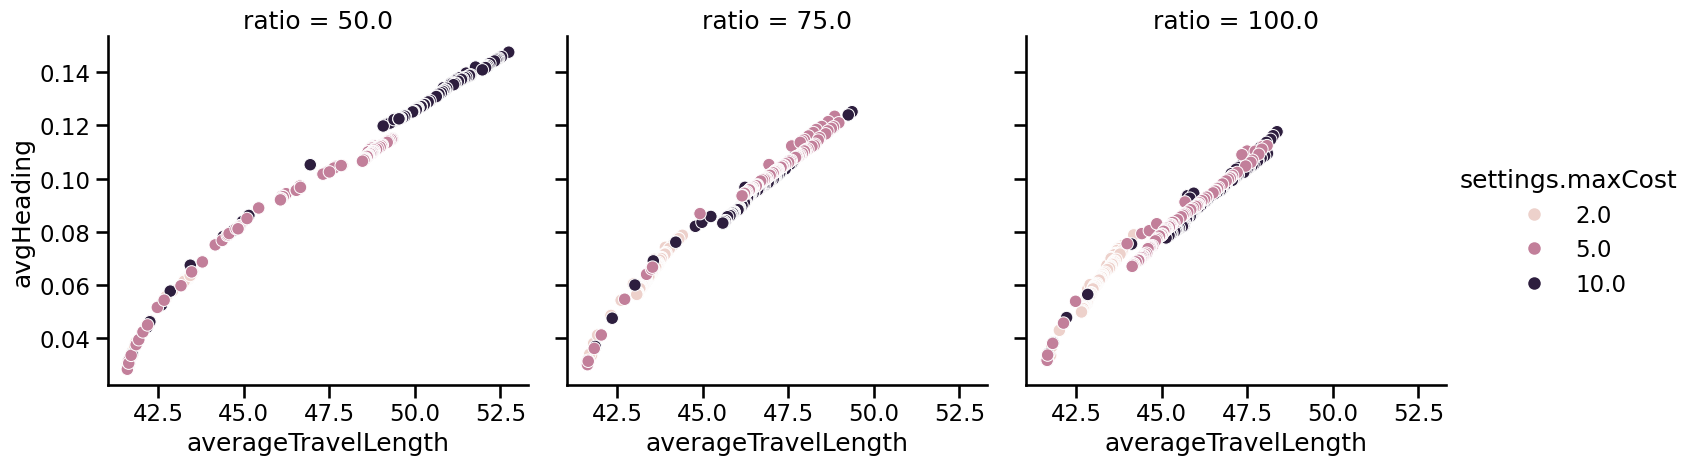

In [66]:
p = sns.relplot(
    data=data[data["steps"] <= 10000],
    x="averageTravelLength",
    y="avgHeading",
    # style="settings.maxCost",
    hue="settings.maxCost",
    col="ratio",
    facet_kws={'sharey': "row"},
)

In [ ]:
p = sns.relplot(
    data=data[data["steps"]],
    x="steps",
    y="averageTravelLength",
    hue="settings.maxCost",
    col="ratio",
    style="settings.maxCost",
    facet_kws={'sharey': "row"},
)

In [63]:
data[(data["steps"] == 3200) & (data["ratio"]==50.0) & (data["settings.maxCost"] == 10.0)].iloc[0]["weightedHeadings"]

[[0.7484319836873841, 1.0077822185373186],
 [0.7449539589959083, 1.0121334212938529],
 [0.7415409591646952, 1.0174262872562316],
 [0.7477676888972169, 1.0174262872562316],
 [0.7537631495988957, 1.0174262872562316],
 [0.7691970561779767, 1.0121334212938529],
 [0.7274696983012943, 1.0476909133900132],
 [0.724685954246683, 1.0574327697305395],
 [0.730881222304345, 1.0574327697305395],
 [0.592261003214539, 1.4142135623730951],
 [0.35241638234956674, 0.03125],
 [0.3526258656271116, 0.03125],
 [0.35283548663165387, 0.03125],
 [0.3530452453170674, 0.03125],
 [0.3532551416366867, 0.03125],
 [0.3534651755433066, 0.03125],
 [0.3536753469891806, 0.03125],
 [0.35388565592601995, 0.03125],
 [0.35409610230499267, 0.03125],
 [0.35430668607672233, 0.03125],
 [0.35451740719128666, 0.03125],
 [0.35472826559821724, 0.03125],
 [0.3549392612464972, 0.03125],
 [0.35515039408456184, 0.03125],
 [0.3553616640602951, 0.03125],
 [0.3555730711210314, 0.03125],
 [0.3557846152135521, 0.03125],
 [0.35599629628408547

In [ ]:
histogram([w[1]*180 for w in weighteds], weights=[w[2] for w in weighteds], bins=50)